In [1]:
import plotly.express as px
import pandas as pd
import plotly.offline as py

In [2]:
df = pd.DataFrame([
    dict(Task="Inc 67",     Start='2009-01-01', Finish='2009-03-05', User="Increment",Sponsor="NASA"),
    dict(Task="Inc 68",     Start='2009-03-05', Finish='2009-06-05', User="Increment",Sponsor="NASA"),
    dict(Task="CrewMin-S6", Start='2009-02-27', Finish='2009-02-28', User="Facility", Sponsor="NASA"),
    dict(Task="CrewMin-S7", Start='2009-04-14', Finish='2009-04-15', User="Facility", Sponsor="NASA"),
    dict(Task="SVGS-1",     Start='2009-02-20', Finish='2009-02-21', User="SVGS",     Sponsor="NatLab"),

])

# compute duration and add new column
df['Duration'] = pd.to_datetime(df['Finish']) - pd.to_datetime(df['Start'])
# Get only hours
#df['Duration'] = df['Duration'].astype(str).map(lambda x: x[7:])
df

,Task,Start,Finish,User,Sponsor,Duration
0,Inc 67,2009-01-01,2009-03-05,Increment,NASA,63 days
1,Inc 68,2009-03-05,2009-06-05,Increment,NASA,92 days
2,CrewMin-S6,2009-02-27,2009-02-28,Facility,NASA,1 days
3,CrewMin-S7,2009-04-14,2009-04-15,Facility,NASA,1 days
4,SVGS-1,2009-02-20,2009-02-21,SVGS,NatLab,1 days


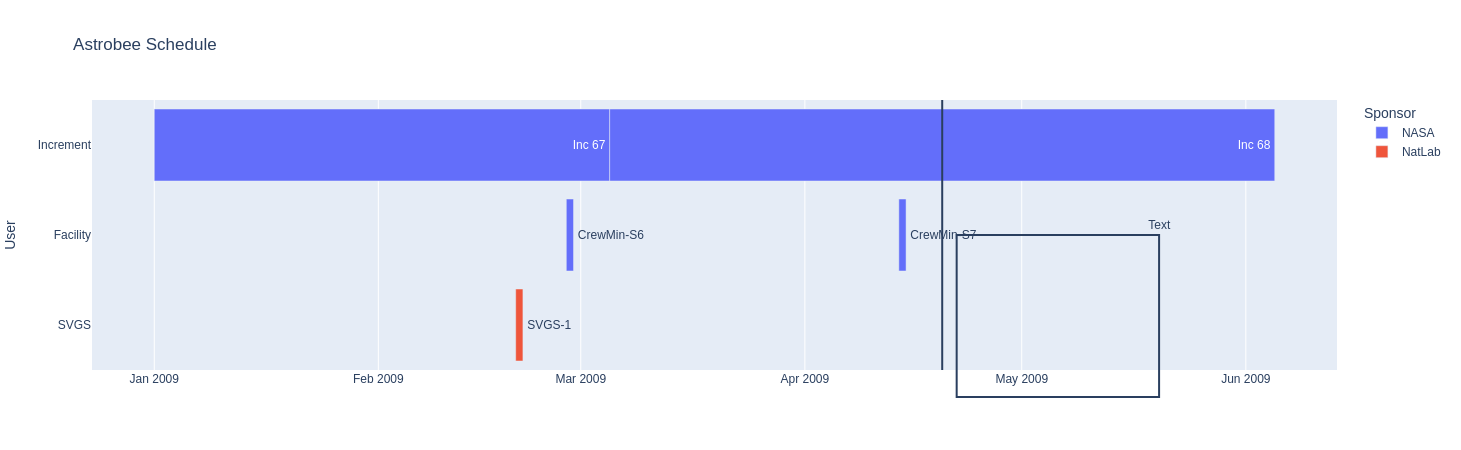

In [9]:
# visualize
fig = px.timeline(df, x_start="Start", x_end="Finish", y="User", width=900, height=450, 
                  color="Sponsor", text="Task", title="Astrobee Schedule",
                  hover_data=['Task', 'Start', 'Finish', 'Duration', 'Sponsor'])

fig.update_yaxes(autorange="reversed")

# add vertical line indicating specific date (e.g. today)
today = '2009-04-20'
date1 = '2009-04-22'
date2 = '2009-05-20'

fig.update_layout(shapes=[
    dict(
      type='line',
      yref='paper', y0=0, y1=1,
      xref='x', x0=today, x1=today
    )
])

fig.add_shape(dict(
      type='rect',
      xref='x', x0=date1, x1=date2,
      yref='paper', y0=-0.1, y1=0.5
    ))

fig.add_annotation(x=date2, y=0.5, yref='paper',
            text="Text",
            showarrow=False, yshift=10)

fig.show()
fig.write_html('PlotlySchedule_figure.html', auto_open=True)

In [14]:
fig.add_image()
fig.layout
fig.data

(Bar({
     'alignmentgroup': 'True',
     'base': array(['2009-01-01', '2009-03-05', '2009-02-27', '2009-04-14'], dtype=object),
     'customdata': array([['Inc 67', Timedelta('63 days 00:00:00'), 'NASA'],
                          ['Inc 68', Timedelta('92 days 00:00:00'), 'NASA'],
                          ['CrewMin-S6', Timedelta('1 days 00:00:00'), 'NASA'],
                          ['CrewMin-S7', Timedelta('1 days 00:00:00'), 'NASA']], dtype=object),
     'hovertemplate': ('Sponsor=%{customdata[2]}<br>St' ... '{customdata[1]}<extra></extra>'),
     'legendgroup': 'NASA',
     'marker': {'color': '#636efa'},
     'name': 'NASA',
     'offsetgroup': 'NASA',
     'orientation': 'h',
     'showlegend': True,
     'text': array(['Inc 67', 'Inc 68', 'CrewMin-S6', 'CrewMin-S7'], dtype=object),
     'textposition': 'auto',
     'x': array([5.4432e+09, 7.9488e+09, 8.6400e+07, 8.6400e+07]),
     'xaxis': 'x',
     'y': array(['Increment', 'Increment', 'Facility', 'Facility'], dtype=object),

extra ref: https://github.com/maxwellbade/plotly_gantt_chart